In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/쇼핑트렌드/shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


Customer ID: 고객을 식별하는 고유 번호

Age: 고객의 나이

Gender: 고객의 성별 (남성/여성)

Item Purchased: 고객이 구매한 상품명

Category: 상품이 속한 카테고리

Purchase Amount (USD): 구매 금액(달러 기준)

Location: 구매가 이루어진 장소 또는 지역

Size: 구매한 상품의 사이즈

Color: 구매한 상품의 색상

Season: 구매가 이루어진 계절

Review Rating: 고객이 남긴 상품 평점

Subscription Status: 구독 서비스 가입 여부 (예/아니오)

Shipping Type: 선택한 배송 방식

Discount Applied: 할인 적용 여부 (예/아니오)

Promo Code Used: 프로모션 코드 사용 여부 (예/아니오)

Previous Purchases: 이전 구매 횟수(이번 거래 제외)

Payment Method: 선호 결제 방식

Frequency of Purchases: 구매 빈도 (예: 매주, 격주, 매월 등)

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df.describe().round(0)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.0,3900.0,3900.0,3900.0,3900.0
mean,1950.0,44.0,60.0,4.0,25.0
std,1126.0,15.0,24.0,1.0,14.0
min,1.0,18.0,20.0,2.0,1.0
25%,976.0,31.0,39.0,3.0,13.0
50%,1950.0,44.0,60.0,4.0,25.0
75%,2925.0,57.0,81.0,4.0,38.0
max,3900.0,70.0,100.0,5.0,50.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

# 모든 18개 컬럼을 사용하는 대신, "고객을 나누는 가장 의미 있는 기준이 무엇일까?

가장 적합한 4개의 컬럼을 의도적으로 선택했다.

In [ ]:
df_selected = df[["Age","Purchase Amount (USD)", "Subscription Status", "Frequency of Purchases"]]
df_selected = pd.get_dummies(df_selected, columns=["Subscription Status"] , drop_first=True)
df_selected = pd.get_dummies(df_selected, columns=["Frequency of Purchases"])
df_selected


,Age,Purchase Amount (USD),Subscription Status_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,True,False,False,False,True,False,False,False
1,19,64,True,False,False,False,True,False,False,False
2,50,73,True,False,False,False,False,False,False,True
3,21,90,True,False,False,False,False,False,False,True
4,45,49,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3895,40,28,False,False,False,False,False,False,False,True
3896,52,49,False,False,True,False,False,False,False,False
3897,46,33,False,False,False,False,False,False,True,False
3898,44,77,False,False,False,False,False,False,False,True


In [ ]:
print("더미 후 df_selected의 정보:")
df_selected.info()
print("\n더미  후 df_selected의 처음 5행:")
print(df_selected.head())

더미 후 df_selected의 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Age                                    3900 non-null   int64
 1   Purchase Amount (USD)                  3900 non-null   int64
 2   Subscription Status_Yes                3900 non-null   bool 
 3   Frequency of Purchases_Annually        3900 non-null   bool 
 4   Frequency of Purchases_Bi-Weekly       3900 non-null   bool 
 5   Frequency of Purchases_Every 3 Months  3900 non-null   bool 
 6   Frequency of Purchases_Fortnightly     3900 non-null   bool 
 7   Frequency of Purchases_Monthly         3900 non-null   bool 
 8   Frequency of Purchases_Quarterly       3900 non-null   bool 
 9   Frequency of Purchases_Weekly          3900 non-null   bool 
dtypes: bool(8), int64(2)
memory usage: 91.5 KB

더미  후 df_selected의 처음 5행:
   A

In [ ]:
# bool 타입을 int 타입으로 변환 (True -> 1, False -> 0)
df_selected_numeric = df_selected.astype(int)

# 변환 결과 확인 (선택 사항)
print("bool 타입 변환 후 df_selected_numeric의 정보:")
df_selected_numeric.info()
print("\nbool 타입 변환 후 df_selected_numeric의 처음 5행:")
print(df_selected_numeric.head())

bool 타입 변환 후 df_selected_numeric의 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Age                                    3900 non-null   int64
 1   Purchase Amount (USD)                  3900 non-null   int64
 2   Subscription Status_Yes                3900 non-null   int64
 3   Frequency of Purchases_Annually        3900 non-null   int64
 4   Frequency of Purchases_Bi-Weekly       3900 non-null   int64
 5   Frequency of Purchases_Every 3 Months  3900 non-null   int64
 6   Frequency of Purchases_Fortnightly     3900 non-null   int64
 7   Frequency of Purchases_Monthly         3900 non-null   int64
 8   Frequency of Purchases_Quarterly       3900 non-null   int64
 9   Frequency of Purchases_Weekly          3900 non-null   int64
dtypes: int64(10)
memory usage: 304.8 KB

bool 타입 변환 후 df_selec

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일러 객체 생성
scaler = StandardScaler()

# 데이터 스케일링 (fit_transform 사용)
df_scaled = scaler.fit_transform(df_selected_numeric)

# 스케일링된 데이터를 DataFrame으로 변환
df_scaled = pd.DataFrame(df_scaled, columns=df_selected_numeric.columns)



In [ ]:
# 스케일링 결과 확인
print("\n스케일링 후 df_scaled의 정보:")
df_scaled.info()
print("\n스케일링 후 df_scaled의 처음 5행:")
print(df_scaled.head())
print("\n스케일링 후 df_scaled의 기술 통계량 (평균과 표준편차 확인):")
print(df_scaled.describe())


스케일링 후 df_scaled의 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3900 non-null   float64
 1   Purchase Amount (USD)                  3900 non-null   float64
 2   Subscription Status_Yes                3900 non-null   float64
 3   Frequency of Purchases_Annually        3900 non-null   float64
 4   Frequency of Purchases_Bi-Weekly       3900 non-null   float64
 5   Frequency of Purchases_Every 3 Months  3900 non-null   float64
 6   Frequency of Purchases_Fortnightly     3900 non-null   float64
 7   Frequency of Purchases_Monthly         3900 non-null   float64
 8   Frequency of Purchases_Quarterly       3900 non-null   float64
 9   Frequency of Purchases_Weekly          3900 non-null   float64
dtypes: float64(10)
memory usage: 304.8 KB

스케일링 후 df_

In [ ]:
df_scaled.head()

,Age,Purchase Amount (USD),Subscription Status_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,-0.285629,1.644294,-0.414578,-0.403903,-0.419662,2.489091,-0.406476,-0.410749,-0.400461
1,-1.648629,0.178852,1.644294,-0.414578,-0.403903,-0.419662,2.489091,-0.406476,-0.410749,-0.400461
2,0.390088,0.558882,1.644294,-0.414578,-0.403903,-0.419662,-0.401753,-0.406476,-0.410749,2.497123
3,-1.517099,1.276716,1.644294,-0.414578,-0.403903,-0.419662,-0.401753,-0.406476,-0.410749,2.497123
4,0.061263,-0.454531,1.644294,2.412091,-0.403903,-0.419662,-0.401753,-0.406476,-0.410749,-0.400461


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df_scaled)
labels = kmeans.predict(df_scaled) # kmeans.labels_

features_for_pca = df_scaled.copy()

# PCA 모델 생성 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(features_for_pca)


# 설명된 분산 비율 확인 (선택 사항)
print(f"PCA 설명된 분산 비율: {pca.explained_variance_ratio_}")
print(f"두 주성분으로 설명되는 총 분산: {sum(pca.explained_variance_ratio_)}")


PCA 설명된 분산 비율: [0.11818498 0.11735305]
두 주성분으로 설명되는 총 분산: 0.23553802878177338


In [ ]:
labels

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_pca

array([[-0.33976791, -0.96066979],
       [ 0.18183142, -1.0183229 ],
       [-1.10220948, -0.94648704],
       ...,
       [-0.4816729 ,  2.36922355],
       [-0.79222907, -0.59175917],
       [-0.40902959,  2.50410494]])

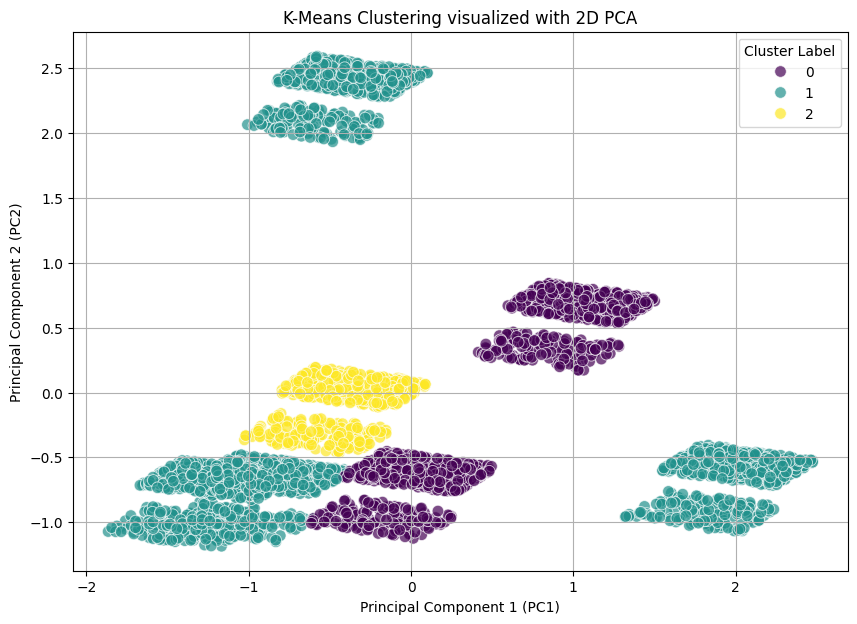

In [ ]:
# PCA 결과를 DataFrame으로 만들고 레이블 추가
df_pca_labeled = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
# 여기에 클러스터 레이블 컬럼 추가
df_pca_labeled['label'] = labels

# PCA 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca_labeled, x='PC1', y='PC2', hue='label', palette='viridis', s=70, alpha=0.7) # s는 점 크기, alpha는 투명도
plt.title('K-Means Clustering visualized with 2D PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()

In [ ]:
print(df_scaled.columns)

Index(['Age', 'Purchase Amount (USD)', 'Subscription Status_Yes',
       'Frequency of Purchases_Annually', 'Frequency of Purchases_Bi-Weekly',
       'Frequency of Purchases_Every 3 Months',
       'Frequency of Purchases_Fortnightly', 'Frequency of Purchases_Monthly',
       'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# K-means 클러스터링 수행
kmeans_plus = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(df_scaled)
labels = kmeans_plus.predict(df_scaled) # kmeans.labels

In [ ]:
if 'label' in df_scaled.columns:
    # K-Means 학습 후 df_scaled에 혹시 'label'이 남아있다면 (보통은 안 남아있음, fit의 입력은 그대로 유지되므로),
    # 또는 다른 이유로 df_scaled에 'label'이 있다면 제거합니다.
    # 하지만 더 중요한 것은 K-Means의 fit에 들어가는 df_scaled 자체가 깨끗해야 한다.
    # 여기서는 K-Means에 사용된 df_scaled와 동일한 (레이블 없는) 특성셋을 PCA에 사용한다고 가정.
    features_for_pca_plus = df_scaled.drop('label', axis=1, errors='ignore').copy()
    if 'label' not in df_scaled.columns : # errors='ignore' 때문에 실제로 제거되었는지 확인 불필요
         print("PCA 입력 데이터 준비: df_scaled에 'label' 컬럼이 없어 그대로 사용합니다 (또는 이미 제거됨).")
    else:
         print("PCA 입력 데이터 준비: df_scaled에서 'label' 컬럼을 제거했습니다.")
else:
    features_for_pca_plus = df_scaled.copy()
    print("PCA 입력 데이터 준비: df_scaled에 'label' 컬럼이 없어 그대로 사용합니다.")


PCA 입력 데이터 준비: df_scaled에 'label' 컬럼이 없어 그대로 사용합니다.


In [ ]:

# PCA 모델 생성 (2개의 주성분으로 축소)
pca_k5 = PCA(n_components=2)
df_pca_plus = pca_k5.fit_transform(features_for_pca_plus)


# 설명된 분산 비율 확인 (선택 사항)
print(f"PCA 설명된 분산 비율: {pca.explained_variance_ratio_}")
print(f"두 주성분으로 설명되는 총 분산: {sum(pca.explained_variance_ratio_)}")



PCA 설명된 분산 비율: [0.11818498 0.11735305]
두 주성분으로 설명되는 총 분산: 0.23553802878177338


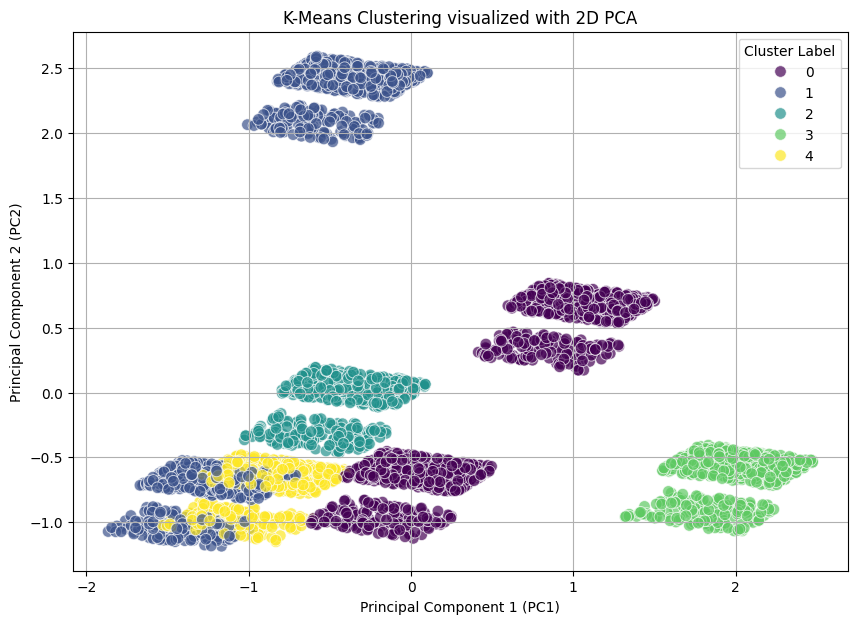

In [ ]:
# PCA 결과를 DataFrame으로 만들고 레이블 추가
df_pca_labeled_plus = pd.DataFrame(data=df_pca_plus, columns=['PC1', 'PC2'])
# 여기에 클러스터 레이블 컬럼 추가
df_pca_labeled_plus['label'] = labels

# PCA 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca_labeled_plus, x='PC1', y='PC2', hue='label', palette='viridis', s=70, alpha=0.7) # s는 점 크기, alpha는 투명도
plt.title('K-Means Clustering visualized with 2D PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()

In [ ]:
wcss = [] # Within-Cluster Sum of Squares 값을 저장할 리스트
k_values = range(1, 11) # 테스트해볼 K값의 범위 (예: 1부터 10까지)

In [ ]:
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans_model.fit(df_scaled) # 여기서 df_scaled는 레이블 없는 순수 특성 데이터
    wcss.append(kmeans_model.inertia_) # inertia_ 속성이 WCSS 값입니다.

# WCSS 값을 그래프로 시각화

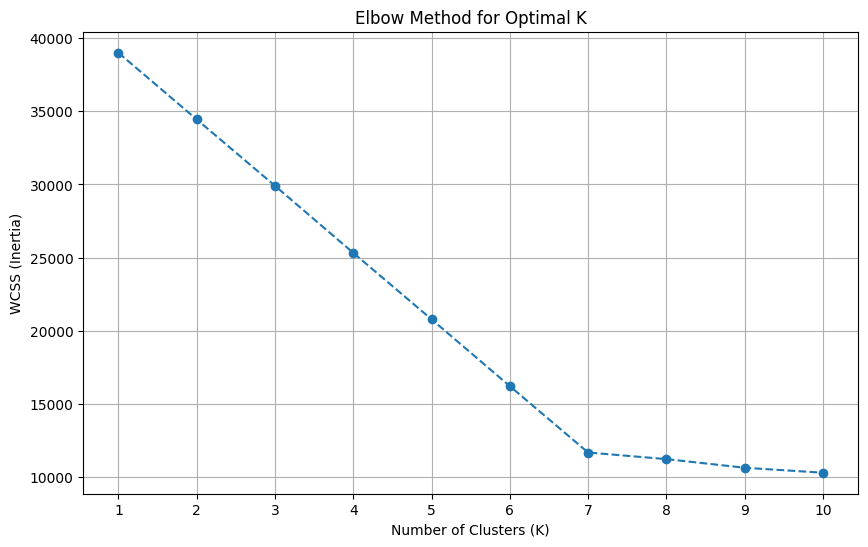

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score


silhouette_scores = [] # 평균 실루엣 점수를 저장할 리스트
k_values = range(2, 11) # 실루엣 점수는 최소 2개 클러스터부터 계산 가능

for k in k_values:
      kmeans_model = KMeans(n_clusters=k, random_state=0, n_init='auto')
      cluster_labels = kmeans_model.fit_predict(df_scaled) # fit과 predict를 동시에
      # 평균 실루엣 점수 계산
      # silhouette_score 함수는 (데이터, 레이블) 순으로 인자를 받습니다.

      score = silhouette_score(df_scaled, cluster_labels)
      silhouette_scores.append(score)
      print(f"K = {k}, Silhouette Score = {score:.4f}")


K = 2, Silhouette Score = 0.1488
K = 3, Silhouette Score = 0.2219
K = 4, Silhouette Score = 0.2944
K = 5, Silhouette Score = 0.3685
K = 6, Silhouette Score = 0.4437
K = 7, Silhouette Score = 0.5176
K = 8, Silhouette Score = 0.4692
K = 9, Silhouette Score = 0.4459
K = 10, Silhouette Score = 0.4348


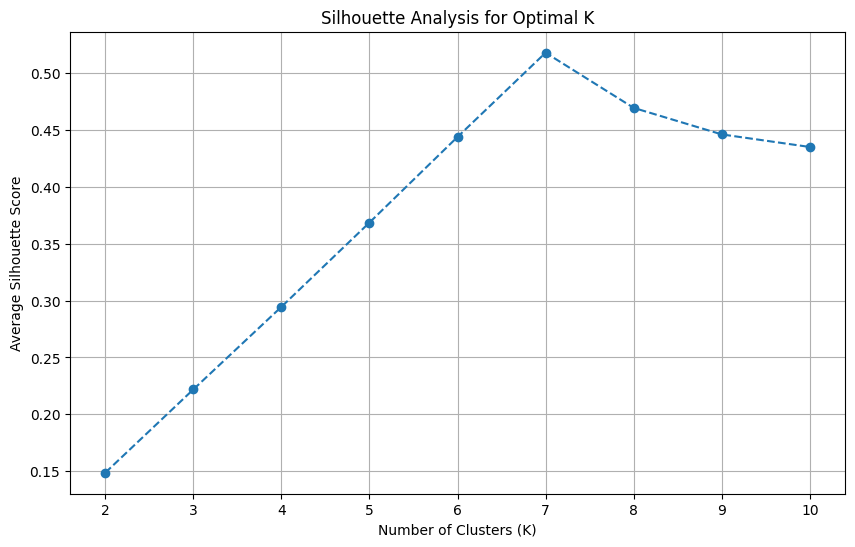

In [ ]:
# 평균 실루엣 점수를 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
final_k = 7
kmeans_final = KMeans(n_clusters=final_k, random_state=0, n_init='auto')
final_labels = kmeans_final.fit_predict(df_scaled) # 또는 .fit(df_scaled) 후 .labels_

In [ ]:
df_selected_numeric['cluster_label'] = final_labels

In [ ]:
df_selected_numeric['cluster_label']

,cluster_label
0,0
1,0
2,4
3,4
4,1
...,...
3895,4
3896,6
3897,5
3898,4


각 고객들을 0부터 숫자로 표시하고 그에 해당하는 값들은 클러스터링 한

집단 값으로 표시된다 (0~6)



In [ ]:
df_selected_numeric['cluster_label'].head()

,cluster_label
0,0
1,0
2,4
3,4
4,1


In [ ]:
df_selected_numeric.groupby('cluster_label').mean()

,Age,Purchase Amount (USD),Subscription Status_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
cluster_label,,,,,,,,,,
0,43.586716,59.053506,0.282288,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44.666084,60.173077,0.279720,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44.283906,59.330922,0.269439,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,43.407534,60.082192,0.263699,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,44.649351,58.972171,0.291280,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,44.685613,59.984014,0.248668,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,43.201097,60.694698,0.255941,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cluster_summary_mean = df_selected_numeric.groupby('cluster_label').mean()
cluster_counts = df_selected_numeric['cluster_label'].value_counts().sort_index() # sort_index()로 클러스터 ID 순 정렬

각 클러스터링 0 부터 6까지 집단에서 소속되어있는 사람 숫자수를 count 값으로 표시한다.

In [ ]:
cluster_counts

,count
cluster_label,
0,542
1,572
2,553
3,584
4,539
5,563
6,547


 df_selected_numeric.groupby('cluster_label').mean() 에 나온 컬럼들로 이름을 지었다.

In [ ]:
dominant_frequencies = {
    0: "Fortnightly",
    1: "Annually",
    2: "Monthly",
    3: "Bi-Weekly", # 또는 데이터셋의 정확한 명칭
    4: "Weekly",
    5: "Quarterly",
    6: "Every 3 Months" # 또는 데이터셋의 정확한 명칭
}

In [ ]:
cluster_names_map = {
    0: "2주 주기 실속형 고객",
    1: "연례 방문형 고객",
    2: "월간 계획형 고객",
    3: "격주 알뜰형 고객", # Fortnightly와 유사하므로, 실제 데이터에서 두 카테고리 의미가 같다면 통합 고려
    4: "위클리 핵심 고객",
    5: "시즈널 알뜰 구매 고객",
    6: "분기별 쇼핑 고객"  # Quarterly와 유사하므로, 실제 데이터에서 두 카테고리 의미가 같다면 통합 고려
}

In [ ]:
# 각 구매 빈도별 마케팅 제안 예시
marketing_suggestions_map = {
    "Weekly": "매주 발행되는 주간 핫딜 정보 및 신상품 알림을 통해 지속적인 관심 유도. 빠른 배송 옵션 강조.",
    "Fortnightly": "2주 주기로 필요한 생활용품이나 식료품 재구매 알림. 함께 구매하면 좋은 상품 추천으로 객단가 증대 유도.",
    "Bi-Weekly": "격주 쇼핑 패턴에 맞춰 특별 할인 쿠폰 또는 포인트 추가 적립 혜택 제공. 정기적인 관심 표현.",
    "Monthly": "월간 구독 서비스 추천 또는 월별 테마 기획전 안내. 월급날 맞이 특별 프로모션 고려.",
    "Quarterly": "계절 변경 시점에 맞춘 시즌 상품 제안 및 할인 이벤트. 대량 구매 시 추가 혜택 제공.",
    "Every 3 Months": "분기별 트렌드 상품 소개 및 스타일링 팁 제공. 다음 구매 시점 예측하여 맞춤형 알림 발송.",
    "Annually": "연간 주요 세일 이벤트(블랙프라이데이, 연말 등) 집중 공략. 기념일 또는 생일 특별 쿠폰 발송으로 재방문 유도 및 고객 감사 메시지 전달."
}

In [ ]:
final_k = 7
cluster_data_for_json = []

# 클러스터별 평균값 및 고객 수는 이전 단계에서 계산되었다고 가정
# cluster_summary_mean = df_selected_numeric.groupby('cluster_label').mean()
# cluster_counts = df_selected_numeric['cluster_label'].value_counts().sort_index()

for i in range(final_k):
    # 해당 클러스터의 주요 구매 빈도 가져오기
    current_frequency = dominant_frequencies.get(i, "N/A")

    cluster_info = {
        "cluster_id": i,
        "cluster_name": cluster_names_map.get(i, f"고객 그룹 {i} ({current_frequency})"), # 위에서 제안한 이름 사용
        "num_customers": int(cluster_counts.get(i, 0)),
        "avg_age": round(cluster_summary_mean.loc[i, 'Age'], 2),
        "avg_purchase_amount": round(cluster_summary_mean.loc[i, 'Purchase Amount (USD)'], 2),
        "subscription_rate": round(cluster_summary_mean.loc[i, 'Subscription Status_Yes'], 4),
        "dominant_frequency": current_frequency,
        "marketing_suggestion": marketing_suggestions_map.get(current_frequency, "맞춤형 마케팅 제안이 필요합니다.") # 위에서 제안한 내용 사용
    }
    cluster_data_for_json.append(cluster_info)

In [ ]:
import json

# 파일 저장 경로 및 이름 설정 (예: 'cluster_analysis_results.json')
# 이 파일은 나중에 React 프로젝트의 public 폴더나 src 폴더로 옮겨서 사용할 수 있다.
json_file_path = 'customer_segments_k7.json'

with open(json_file_path, 'w', encoding='utf-8') as f:
    json.dump(cluster_data_for_json, f, ensure_ascii=False, indent=4)

print(f"JSON 파일이 '{json_file_path}' 경로에 저장되었습니다.")

JSON 파일이 'customer_segments_k7.json' 경로에 저장되었습니다.


In [ ]:
print(f"JSON 파일이 '{json_file_path}' 경로에 저장되었습니다.")
print("\n생성된 JSON 데이터 미리보기 (첫 번째 클러스터):")
if cluster_data_for_json:
    print(json.dumps(cluster_data_for_json[0], ensure_ascii=False, indent=4))

JSON 파일이 'customer_segments_k7.json' 경로에 저장되었습니다.

생성된 JSON 데이터 미리보기 (첫 번째 클러스터):
{
    "cluster_id": 0,
    "cluster_name": "2주 주기 실속형 고객",
    "num_customers": 542,
    "avg_age": 43.59,
    "avg_purchase_amount": 59.05,
    "subscription_rate": 0.2823,
    "dominant_frequency": "Fortnightly",
    "marketing_suggestion": "2주 주기로 필요한 생활용품이나 식료품 재구매 알림. 함께 구매하면 좋은 상품 추천으로 객단가 증대 유도."
}


# 추가적인 데이터 뽑기

원본 df에 'cluster_label' 컬럼 추가하기

In [ ]:
# 원본 데이터프레임 df에 클러스터링 결과를 새로운 컬럼으로 추가
df['cluster_label'] = final_labels

In [ ]:
final_labels

array([0, 0, 4, ..., 5, 4, 5], dtype=int32)

In [ ]:
df['cluster_label']

,cluster_label
0,0
1,0
2,4
3,4
4,1
...,...
3895,4
3896,6
3897,5
3898,4


In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster_label
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,4
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,4
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,1


In [ ]:
df['Item Purchased'].value_counts().head()

,count
Item Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166


In [ ]:
cluster_df = df[df['cluster_label'] == 0].copy()
cluster_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster_label
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0
11,12,30,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly,0
12,13,61,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly,0
36,37,35,Male,T-shirt,Clothing,69,Illinois,M,Maroon,Winter,4.6,Yes,Free Shipping,Yes,Yes,44,PayPal,Fortnightly,0


In [ ]:
total_customers_in_cluster = len(cluster_df)
total_customers_in_cluster

542

In [ ]:
cluster_df['Location'].value_counts().head(3)

,count
Location,
Nebraska,18
Ohio,18
Alaska,18


In [ ]:
df["Discount Applied"].value_counts("Yes")

,proportion
Discount Applied,
No,0.57
Yes,0.43


In [ ]:
# 각 클러스터별로 분석 결과를 저장할 딕셔너리
cluster_analysis_results = {}
num_clusters = 7 # final_k

# 원본 데이터의 각 컬럼별 총 개수를 미리 계산
total_items_count_overall = df['Item Purchased'].count()
total_categories_count_overall = df['Category'].count()
total_locations_count_overall = df['Location'].count()
total_seasons_count_overall = df['Season'].count()
total_payment_methods_count_overall = df['Payment Method'].count()


for i in range(num_clusters):
   # 해당 클러스터 데이터만 필터링
    cluster_df = df[df['cluster_label'] == i].copy()
    total_customers_in_cluster = len(cluster_df)

     # 데이터가 없는 클러스터는 건너뛰기
    if total_customers_in_cluster == 0:
        continue


    # 상위 5개 아이템과 상위 4개 카테고리 추출

    top_items_series = cluster_df['Item Purchased'].value_counts().head(5)
    top_items = [
        {
            "items": name,
            "cluster_count": int(count),
            "cluster_percentage": round(count / total_customers_in_cluster * 100, 2),
            "overall_percentage": round(df['Item Purchased'].value_counts().get(name, 0) / total_items_count_overall * 100, 2)
        }
        for name, count in top_items_series.items()
    ]
    top_categories_series = cluster_df['Category'].value_counts().head(4)
    top_categories = [
        {
            "category": name,
            "cluster_count": int(count),
            "cluster_percentage": round(count / total_customers_in_cluster * 100, 2),
            "overall_percentage": round(df['Category'].value_counts().get(name, 0) / total_categories_count_overall * 100, 2)
        }
        for name, count in top_categories_series.items()
    ]

    # 상위 5개 지역 추출
    top_location_series = cluster_df['Location'].value_counts().head(5)
    top_location = [
        {
            "location": name,
            "cluster_count": int(count),
            "cluster_percentage": round(count / total_customers_in_cluster * 100, 2),
             "overall_percentage": round(df['Location'].value_counts().get(name, 0) / total_locations_count_overall * 100, 2)
        }
        for name, count in top_location_series.items()
    ]
    # 4계절 선호도 순위 추출
    top_season_series = cluster_df['Season'].value_counts()
    top_season = [
        {
            "season": name,
            "cluster_count": int(count),
            "cluster_percentage": round(count / total_customers_in_cluster * 100, 2),
            "overall_percentage": round(df['Season'].value_counts().get(name, 0) / total_seasons_count_overall * 100, 2)
        }
        for name, count in top_season_series.items()
    ]

    # 상위 3개 결제 수단 추출
    top_payment_series = cluster_df['Payment Method'].value_counts().head(3)
    top_payment = [
        {
            "payment": name,
            "cluster_count": int(count),
            "cluster_percentage": round(count / total_customers_in_cluster * 100, 2),
             "overall_percentage": round(df['Payment Method'].value_counts().get(name, 0) / total_payment_methods_count_overall * 100, 2)

        }
        for name, count in top_payment_series.items()
    ]
    # 할인 사용률(%) 계산
    discount_usage_rate =  round(cluster_df['Discount Applied'].value_counts(normalize=True).get('Yes',0) * 100, 2)

    # 평균 리뷰 점수 계산
    review_rating_score = round(cluster_df['Review Rating'].mean(), 2)

    # 결과 저장
    cluster_analysis_results[i] = {
        "top_items": top_items,
        "top_categories": top_categories,
        "top_location": top_location,
        "top_season": top_season,
        "top_payment": top_payment,
        "discount_usage_rate": discount_usage_rate,
        "review_rating_score": review_rating_score
    }

In [ ]:
# 원본 데이터의 각 컬럼별 고유 값 개수 계산
unique_items = df['Item Purchased'].unique()
total_unique_items = len(unique_items)

unique_payment_methods = df['Payment Method'].unique()
total_unique_payment_methods = len(unique_payment_methods)

unique_locations = df['Location'].unique()
total_unique_locations = len(unique_locations)

unique_categories = df['Category'].unique() # unique_categories가 이미 정의되지 않았다면 여기서 정의합니다.
total_unique_categories = len(unique_categories)

In [ ]:
# cluster_analysis_results 딕셔너리에 새로운 키를 추가하여 원본 데이터 정보 저장

cluster_analysis_results['overall_data_summary'] = {
    "total_unique_items": total_unique_items,
    "total_unique_payment": total_unique_payment_methods,
    "total_unique_locations": total_unique_locations,
    "total_unique_categories": total_unique_categories
}


In [ ]:
# 최종 결과 확인
import json
print(json.dumps(cluster_analysis_results, indent=4, ensure_ascii=False))

{
    "0": {
        "top_items": [
            {
                "items": "Sneakers",
                "cluster_count": 28,
                "cluster_percentage": 5.17,
                "overall_percentage": 3.72
            },
            {
                "items": "Coat",
                "cluster_count": 27,
                "cluster_percentage": 4.98,
                "overall_percentage": 4.13
            },
            {
                "items": "Jacket",
                "cluster_count": 26,
                "cluster_percentage": 4.8,
                "overall_percentage": 4.18
            },
            {
                "items": "Sweater",
                "cluster_count": 25,
                "cluster_percentage": 4.61,
                "overall_percentage": 4.21
            },
            {
                "items": "Boots",
                "cluster_count": 25,
                "cluster_percentage": 4.61,
                "overall_percentage": 3.69
            }
        ],
        "top_ca

In [ ]:
file_to_save = 'customer_segments_detailed.json'

with open(file_to_save, 'w', encoding='utf-8') as f:
    json.dump(cluster_analysis_results, f, ensure_ascii=False, indent=4)

print(f"JSON 파일이 '{file_to_save}' 경로에 저장되었습니다.")

JSON 파일이 'customer_segments_detailed.json' 경로에 저장되었습니다.


두 데이터 합치기

In [ ]:
import json

# 1. 기존 데이터를 불러옵니다 (파일 경로는 실제 위치에 맞게 수정)
with open(json_file_path, 'r', encoding='utf-8') as f:
        original_data = json.load(f)

# 2. 'cluster_analysis_results'는 방금 위에서 생성한 딕셔너리입니다.
# (이 코드는 cluster_analysis_results가 이미 생성된 셀 다음에 와야 합니다)

# 3. 두 데이터를 합칩니다.
final_data = []
for original_cluster in  original_data:
  if 'cluster_id' in original_cluster:
    cluster_id = original_cluster['cluster_id']


    if cluster_id in cluster_analysis_results:
      original_cluster.update(cluster_analysis_results[cluster_id])
  else:
      print(f"Warning: cluster_id {cluster_id} not found in cluster_analysis_results.")




  final_data.append(original_cluster)

# 4. 최종적으로 합쳐진 데이터를 새로운 JSON 파일로 저장합니다.
final_json_path = 'customer_segments_final.json'
with open(final_json_path, 'w', encoding='utf-8') as f:
    json.dump(final_data, f, ensure_ascii=False, indent=4)

print(f"모든 정보가 통합된 최종 JSON 파일이 '{final_json_path}' 경로에 저장되었습니다.")
print("\n통합된 데이터 미리보기 (첫 번째 클러스터):")
print(json.dumps(final_data[0], ensure_ascii=False, indent=4))

모든 정보가 통합된 최종 JSON 파일이 'customer_segments_final.json' 경로에 저장되었습니다.

통합된 데이터 미리보기 (첫 번째 클러스터):
{
    "cluster_id": 0,
    "cluster_name": "2주 주기 실속형 고객",
    "num_customers": 542,
    "avg_age": 43.59,
    "avg_purchase_amount": 59.05,
    "subscription_rate": 0.2823,
    "dominant_frequency": "Fortnightly",
    "marketing_suggestion": "2주 주기로 필요한 생활용품이나 식료품 재구매 알림. 함께 구매하면 좋은 상품 추천으로 객단가 증대 유도.",
    "top_items": [
        {
            "items": "Sneakers",
            "cluster_count": 28,
            "cluster_percentage": 5.17,
            "overall_percentage": 3.72
        },
        {
            "items": "Coat",
            "cluster_count": 27,
            "cluster_percentage": 4.98,
            "overall_percentage": 4.13
        },
        {
            "items": "Jacket",
            "cluster_count": 26,
            "cluster_percentage": 4.8,
            "overall_percentage": 4.18
        },
        {
            "items": "Sweater",
            "cluster_count": 25,
            "cl

In [ ]:
# 최종 데이터를 저장할 새로운 딕셔너리를 만듭니다.
final_output_data = {
    "cluster_segments": final_data, # 클러스터별 정보 리스트
    "overall_data_summary": cluster_analysis_results.get("overall_data_summary", {}) # 원본 데이터 요약 정보 가져오기
}


# 이 새로운 딕셔너리를 JSON 파일로 저장합니다.
final_json_path = 'customer_segments_final_method2.json'
with open(final_json_path, 'w', encoding='utf-8') as f:
    json.dump(final_output_data, f, ensure_ascii=False, indent=4)

print(f"모든 정보가 통합된 최종 JSON 파일 (방법 2)이 '{final_json_path}' 경로에 저장되었습니다.")

모든 정보가 통합된 최종 JSON 파일 (방법 2)이 'customer_segments_final_method2.json' 경로에 저장되었습니다.


In [ ]:

# 'Category' 컬럼의 고유 값들을 가져옵니다.
unique_categories = df['Category'].unique()

# 고유 값의 개수를 셉니다.
total_unique_categories = len(unique_categories)

print(f"원본 데이터의 'Category' 컬럼은 총 {total_unique_categories}가지 고유 카테고리로 구성되어 있습니다.")


원본 데이터의 'Category' 컬럼은 총 4가지 고유 카테고리로 구성되어 있습니다.


In [ ]:
# 'Location' 컬럼의 고유 값들을 가져옵니다.
unique_locations = df['Location'].unique()

# 고유 값의 개수를 셉니다.
total_unique_locations = len(unique_locations)

print(f"원본 데이터의 'Location' 컬럼은 총 {total_unique_locations}가지 고유 지역으로 구성되어 있습니다.")

원본 데이터의 'Location' 컬럼은 총 50가지 고유 지역으로 구성되어 있습니다.


In [ ]:
# 'Payment Method' 컬럼의 고유 값들을 가져옵니다.

unique_payment_methods = df['Payment Method'].unique()

# 고유 값의 개수를 셉니다.
total_unique_payment_methods = len(unique_payment_methods)

print(f"원본 데이터의 'Payment Method' 컬럼은 총 {total_unique_payment_methods}가지 고유 지불 방식으로 구성되어 있습니다.")

원본 데이터의 'Payment Method' 컬럼은 총 6가지 고유 지불 방식으로 구성되어 있습니다.


In [ ]:
# 'Item Purchased' 컬럼의 고유 값들을 가져옵니다.
unique_items = df['Item Purchased'].unique()

# 고유 값의 개수를 셉니다.
total_unique_items = len(unique_items)

print(f"원본 데이터의 'Item Purchased' 컬럼은 총 {total_unique_items}가지 고유 상품으로 구성되어 있습니다.")

원본 데이터의 'Item Purchased' 컬럼은 총 25가지 고유 상품으로 구성되어 있습니다.


In [ ]:
# 전체 고객의 아이템별 구매 빈도 계산
overall_items_counts = df['Item Purchased'].value_counts()

# 전체 고객 수
total_customers_overall = len(df)

# 아이템별 전체 평균 구매율 계산 및 JSON 형식으로 변환
overall_items_purchase_rate = [
    {
        "item": item,
        "overall_count": int(count),
        "overall_percentage": round(count / total_customers_overall * 100, 2)
    }
    for item, count in overall_items_counts.items()
]

# 기존 final_output_data 딕셔너리에 전체 아이템 구매율 정보 추가
# 'overall_data_summary' 키가 이미 있다면 업데이트하고, 없다면 새로 생성합니다.
if 'overall_data_summary' not in final_output_data:
    final_output_data['overall_data_summary'] = {}

final_output_data['overall_data_summary']['overall_items_purchase_rate'] = overall_items_purchase_rate


# 최종 데이터를 JSON 파일로 저장합니다.
final_json_path_updated = 'customer_segments_final_updated.json'
with open(final_json_path_updated, 'w', encoding='utf-8') as f:
    json.dump(final_output_data, f, ensure_ascii=False, indent=4)

print(f"전체 아이템 구매율 정보가 추가된 최종 JSON 파일이 '{final_json_path_updated}' 경로에 저장되었습니다.")
print("\n통합된 데이터 미리보기 (overall_data_summary의 전체 아이템 구매율):")
# 전체 아이템 구매율 정보만 미리보기
print(json.dumps(final_output_data.get('overall_data_summary', {}).get('overall_items_purchase_rate', [])[:5], ensure_ascii=False, indent=4)) # 상위 5개만 미리보기

전체 아이템 구매율 정보가 추가된 최종 JSON 파일이 'customer_segments_final_updated.json' 경로에 저장되었습니다.

통합된 데이터 미리보기 (overall_data_summary의 전체 아이템 구매율):
[
    {
        "item": "Blouse",
        "overall_count": 171,
        "overall_percentage": 4.38
    },
    {
        "item": "Pants",
        "overall_count": 171,
        "overall_percentage": 4.38
    },
    {
        "item": "Jewelry",
        "overall_count": 171,
        "overall_percentage": 4.38
    },
    {
        "item": "Shirt",
        "overall_count": 169,
        "overall_percentage": 4.33
    },
    {
        "item": "Dress",
        "overall_count": 166,
        "overall_percentage": 4.26
    }
]
